<a href="https://colab.research.google.com/github/shuklasid19/Assignment-2-analyticsmagzine/blob/main/bankbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT 

dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 

2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)


BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)




In [1]:
#import the libraries 
# and reading the dataset 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#read the data
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

In [2]:
#top most points in our data set
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#gives information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
#describes the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#shape of the dataset
#we have 30000 rows and 25 features 1 of them is target variable 
df.shape

(30000, 25)

In [6]:
#no missing values it seems 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
#names of columns in our dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
#its id so we will drop the feature
df['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64

In [9]:
# we need to rename 2 columns 'PAY_0' to 'PAY_1'
df = df.rename(columns = {'default.payment.next.month': 'def_pay',
                          'PAY_0': 'PAY_1'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Limit bal')

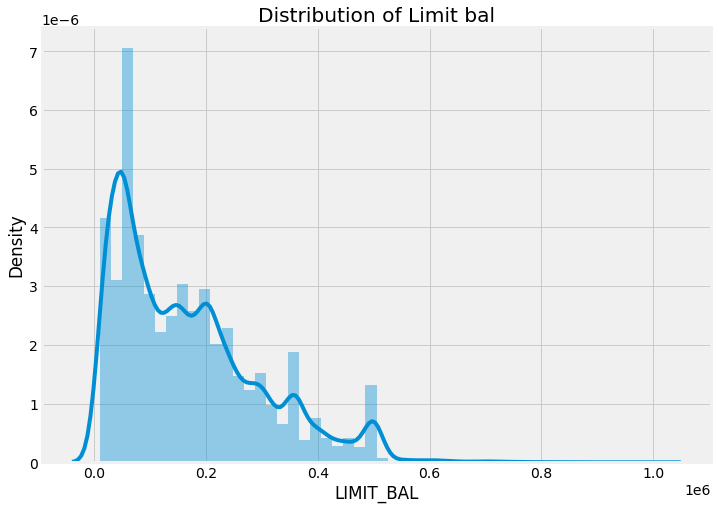

In [10]:
#limit bal distribution
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['LIMIT_BAL'])
plt.title("Distribution of Limit bal")

#our limit bal is right skewed 

In [11]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

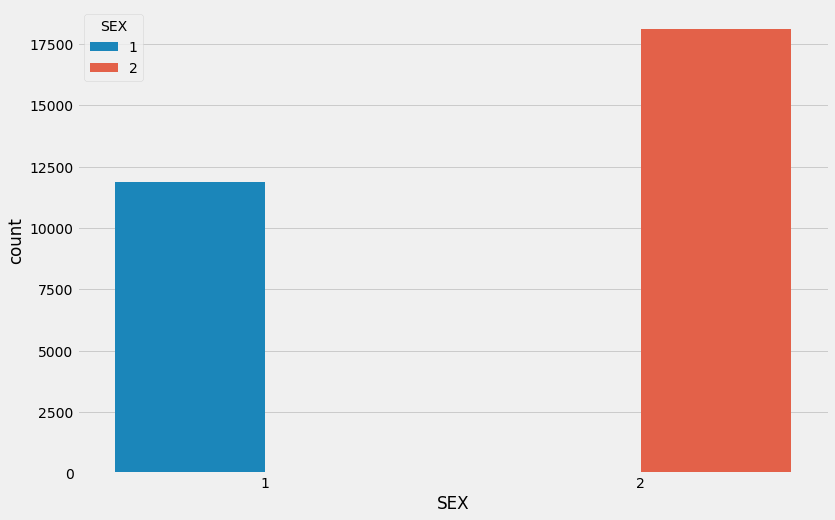

In [12]:
#count of both the sex male and female
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(x='SEX',data=df,hue = 'SEX')

In [13]:
#education categories
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

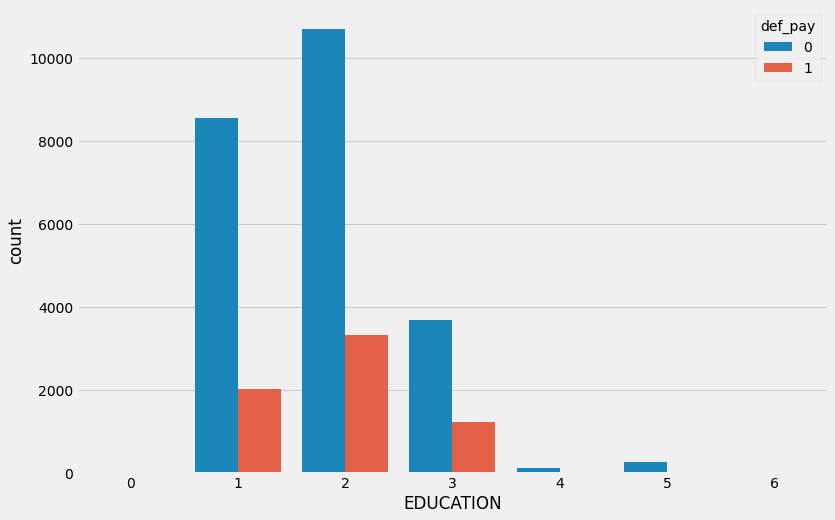

In [14]:
#count of education and default pay
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(x="EDUCATION", data=df,hue="def_pay")

#it appears that 4 and 5 are missing 0, 6 dont have any points..
# (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 

In [15]:
df['MARRIAGE'].value_counts()
#Marital status (1=married, 2=single, 3=others)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


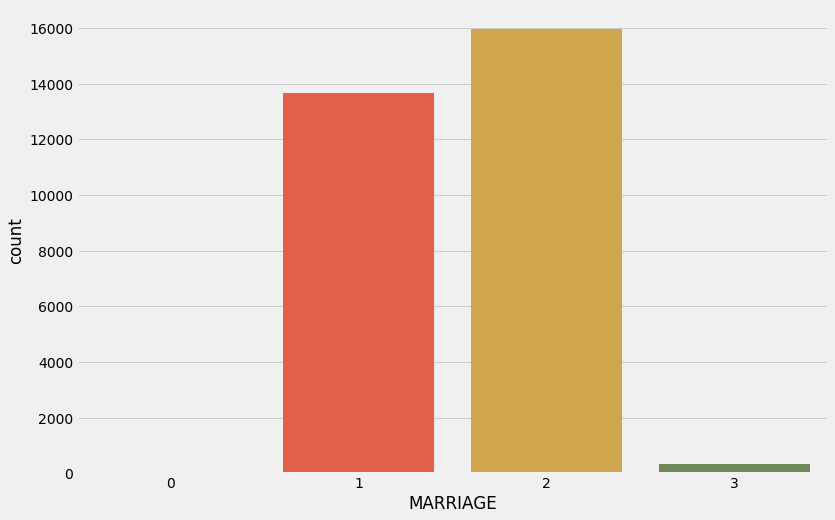

In [16]:
#marriage count 1=married, 2=single, 3=others 
#0 category has only 54 points


plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.countplot(df['MARRIAGE'])

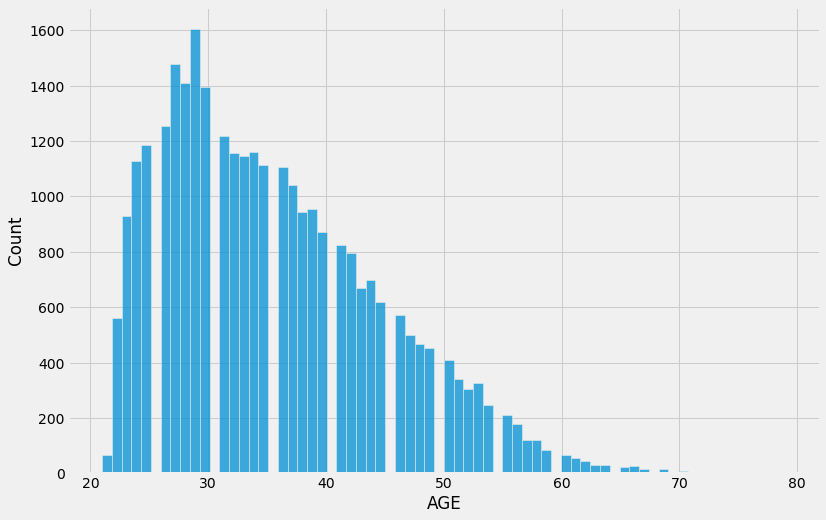

In [17]:
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.histplot(df['AGE'])

In [18]:
#most people are young and as age increases the number decreases
#distrubution is righly skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


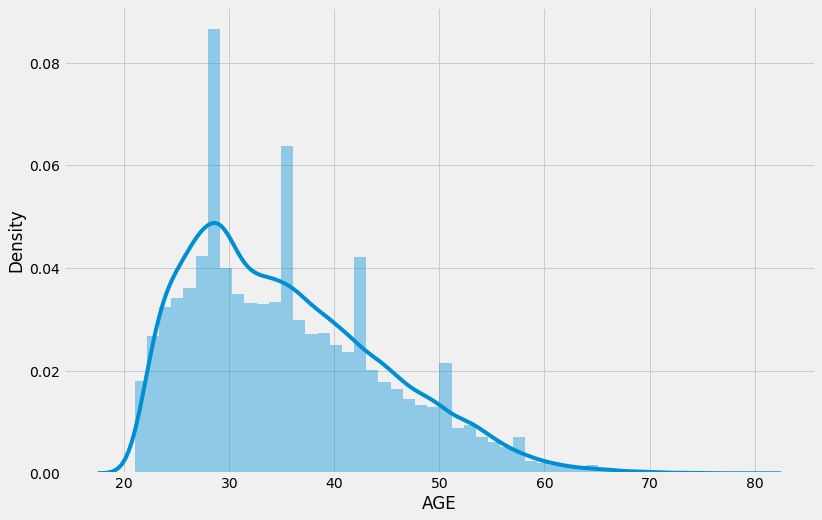

In [19]:
#AGE: Age in years
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
sns.distplot(df['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1')

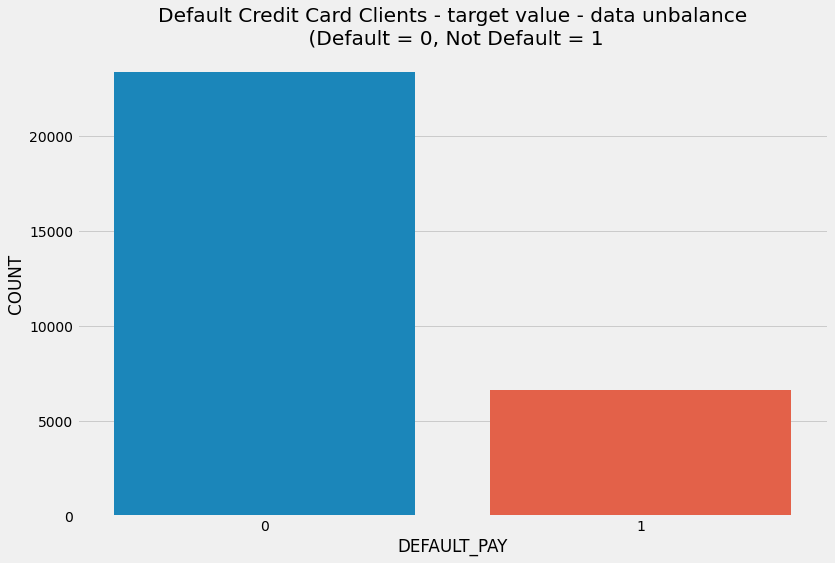

In [20]:
#default.payment.next.month: Default payment (1=yes, 0=no)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12 , 8))
sns.countplot(df['def_pay'])
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1')

Our target is imbalanced

In [21]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

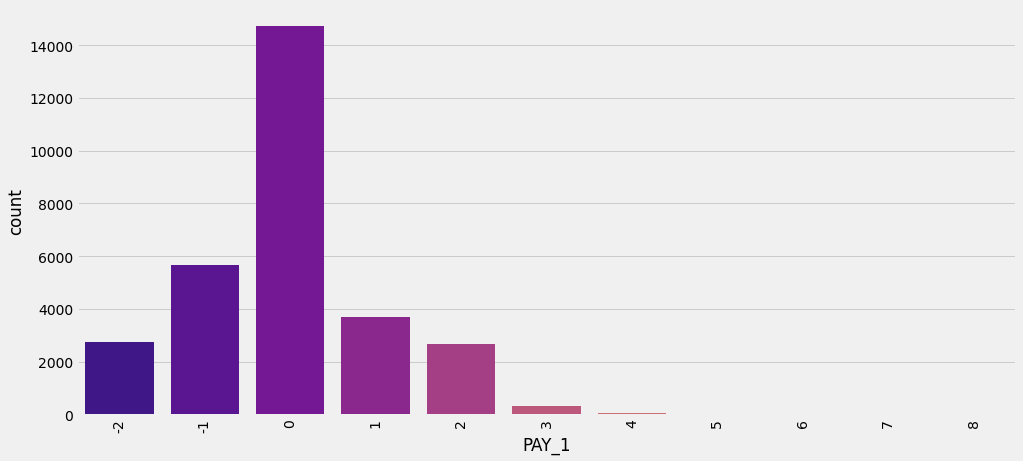

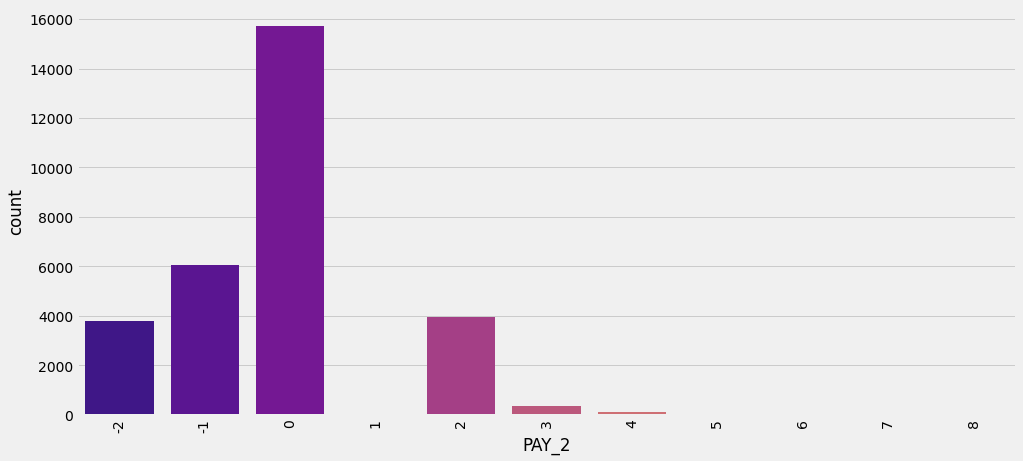

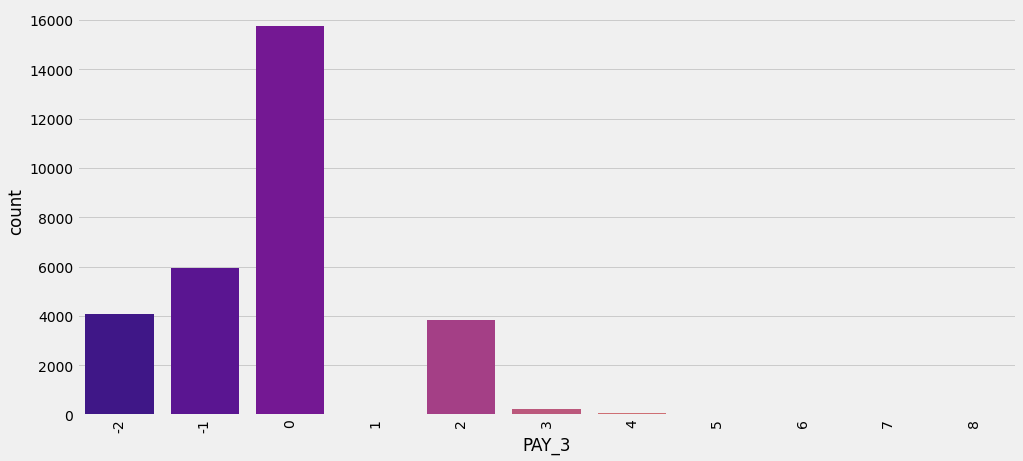

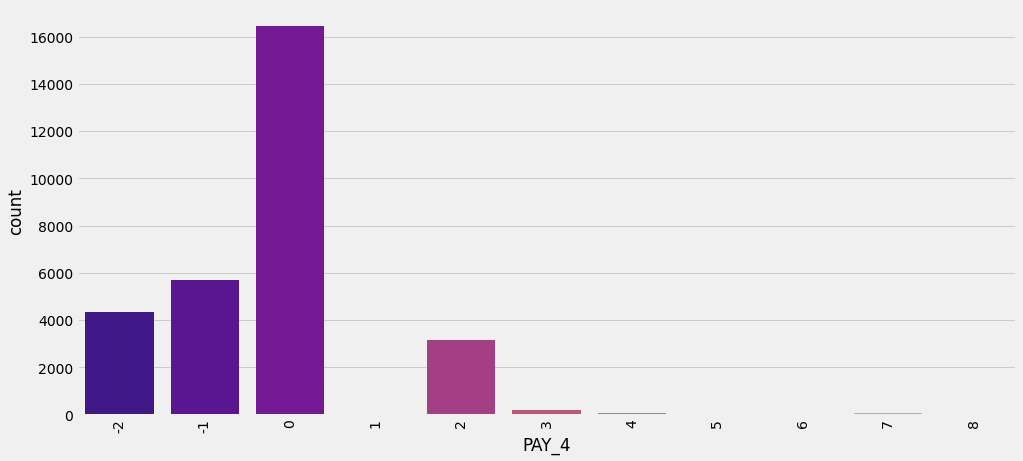

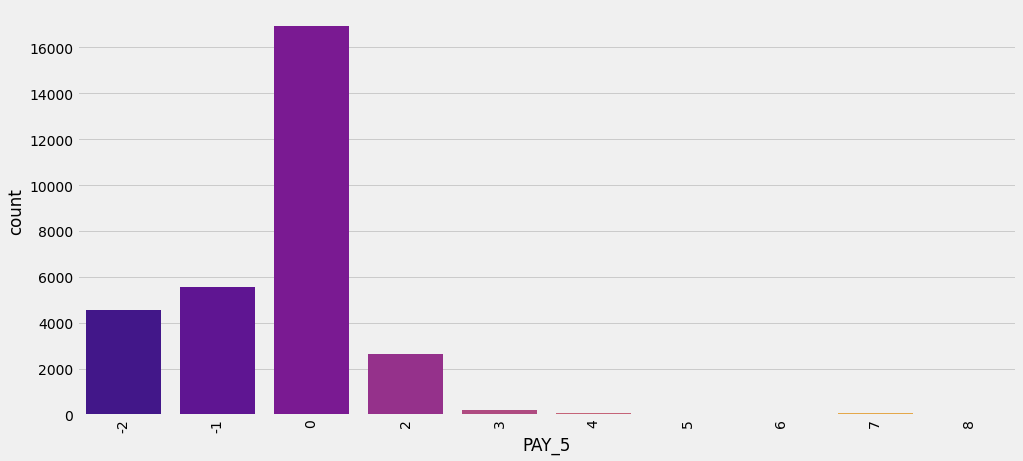

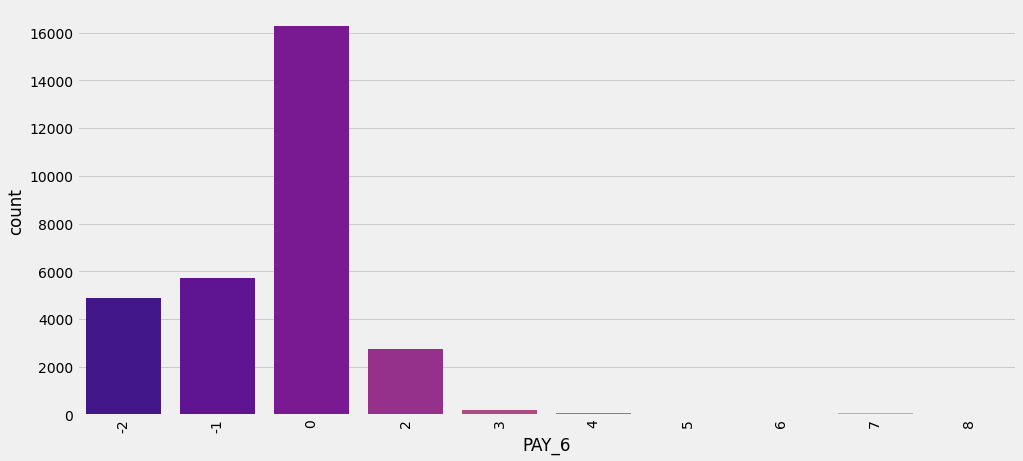

In [22]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in toview:
    drawplot(col)

#AY_AMT: Amount of previous payment 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

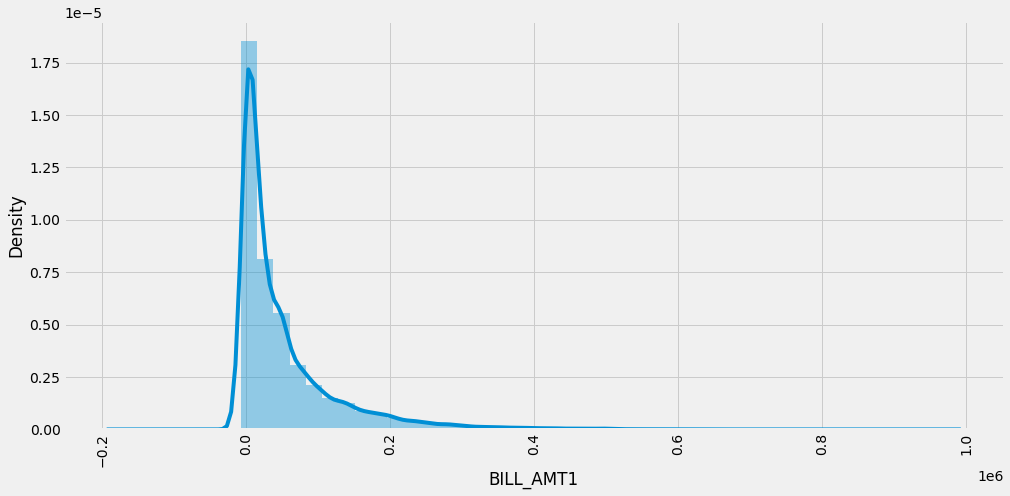

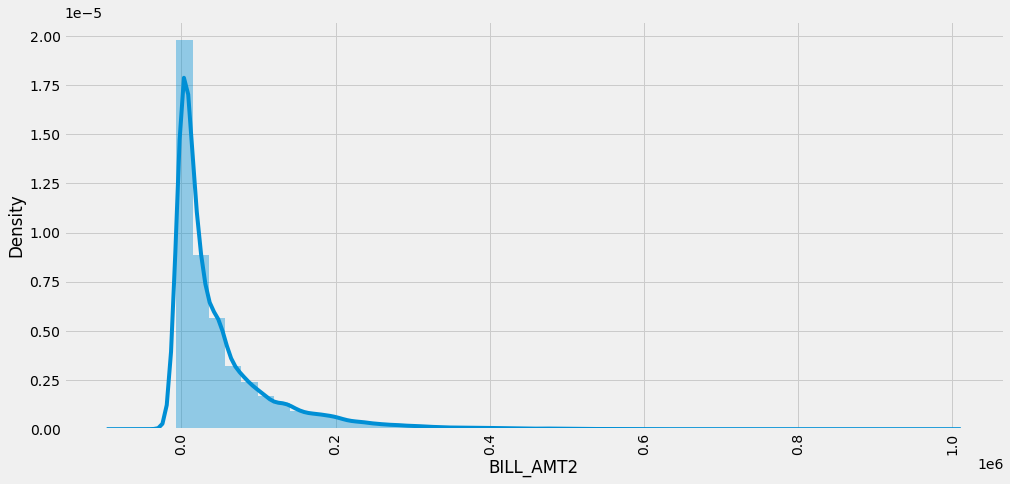

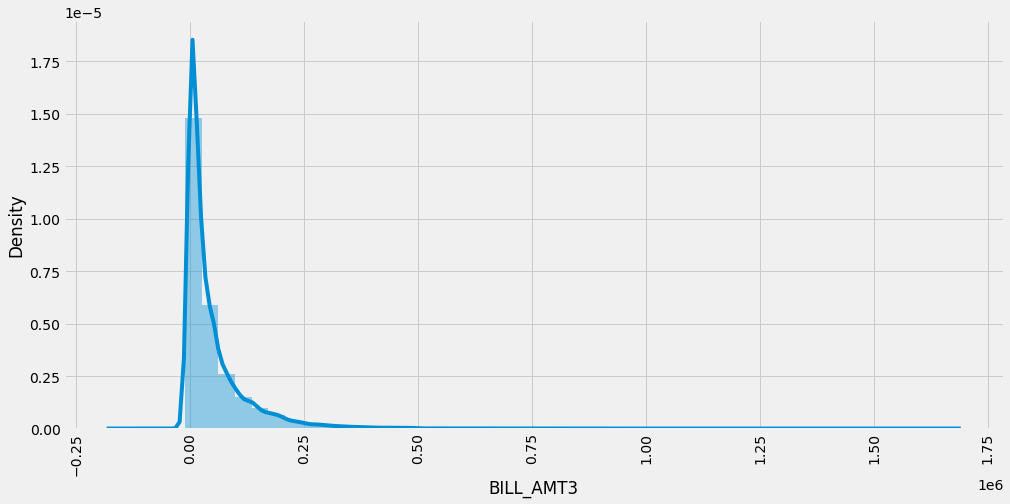

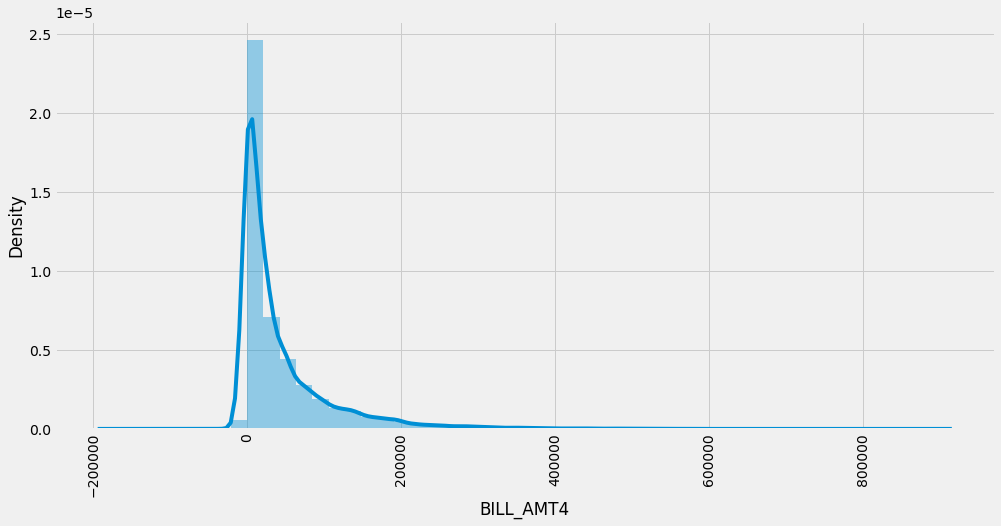

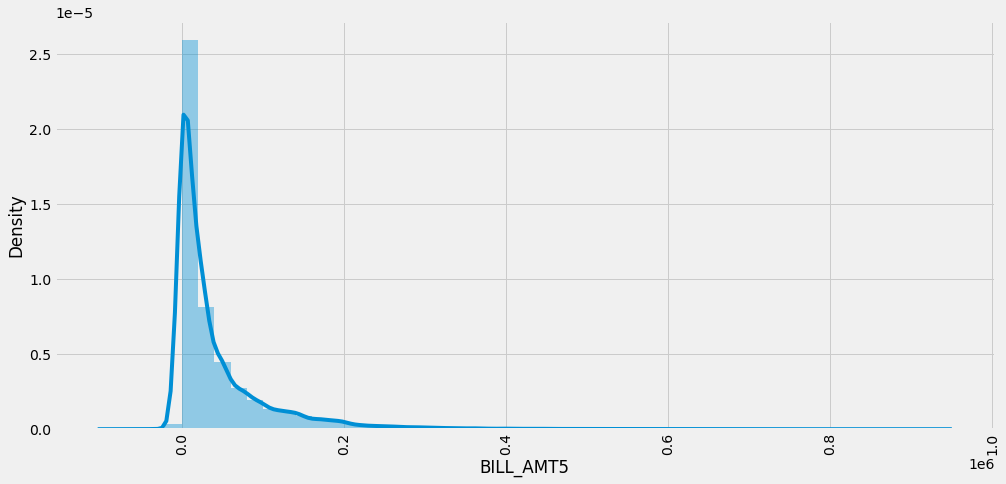

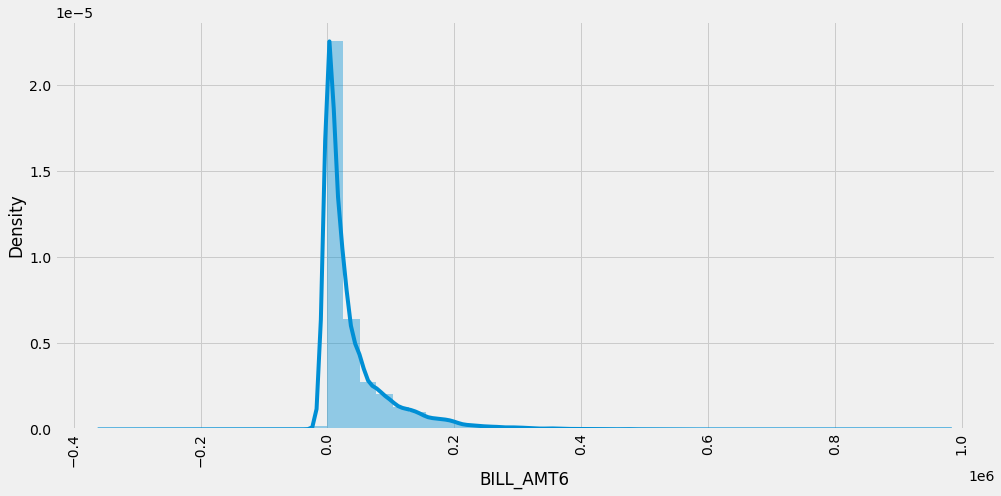

In [23]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.xticks(rotation='vertical')
    
toview = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in toview:
    drawplot(col)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

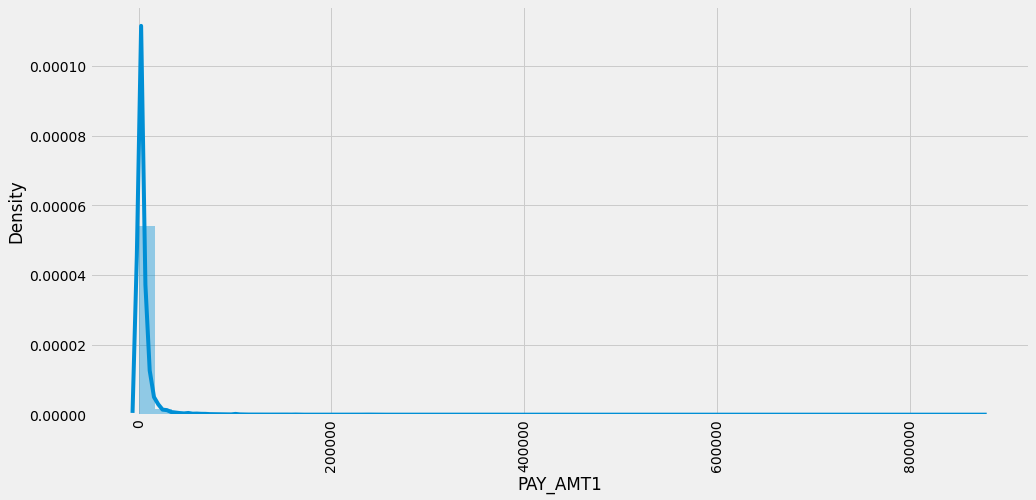

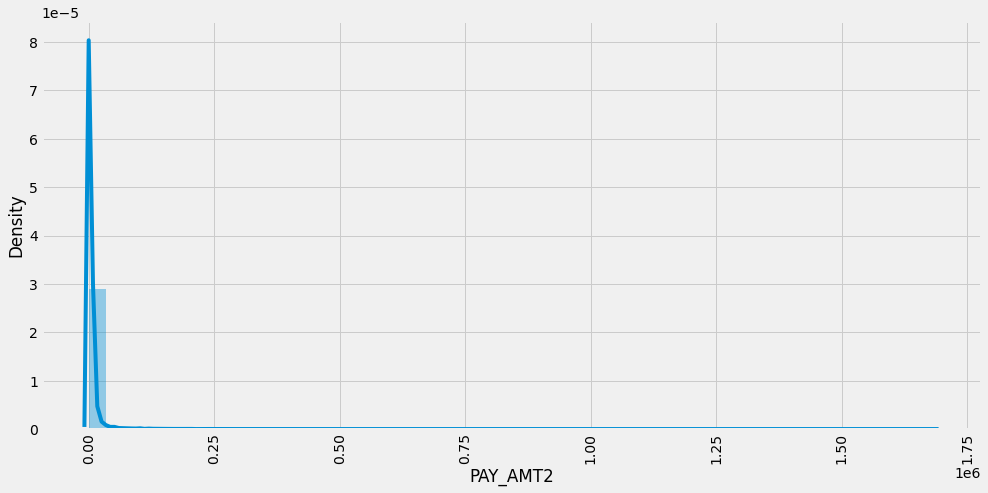

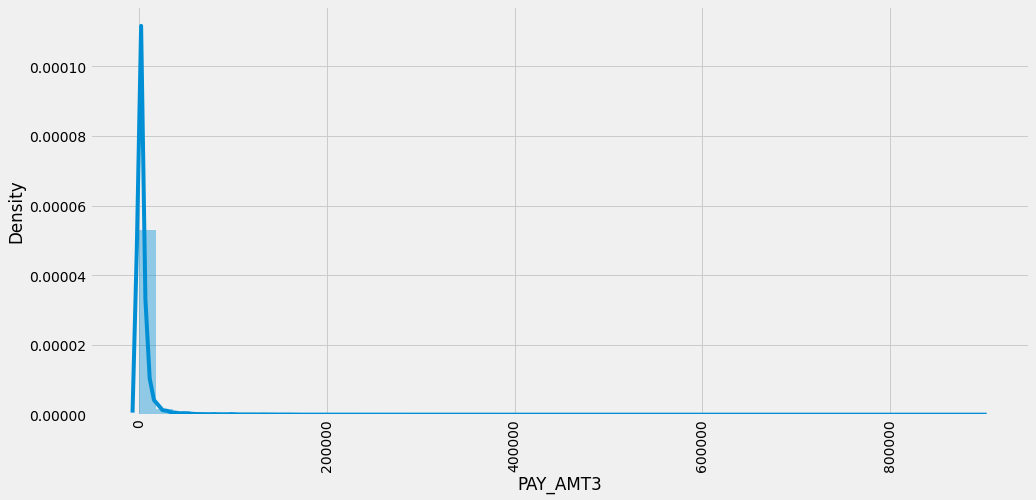

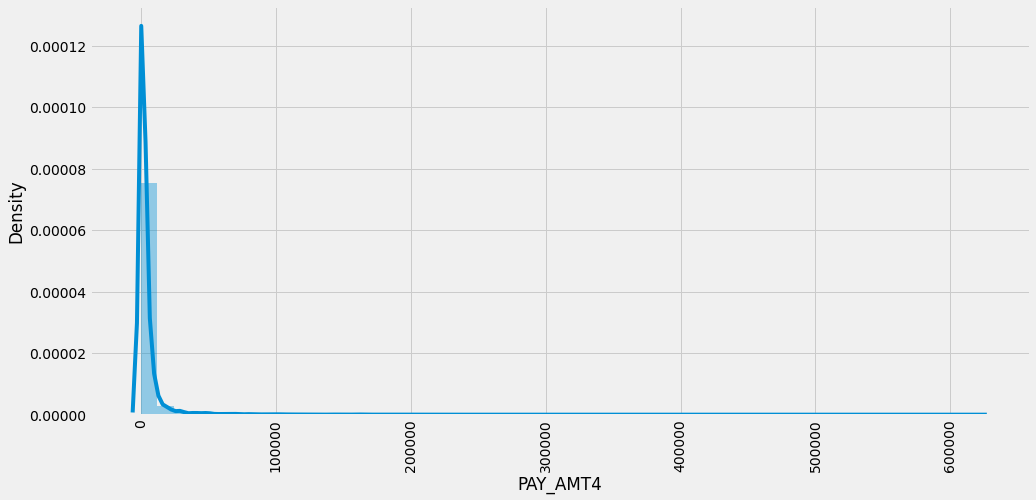

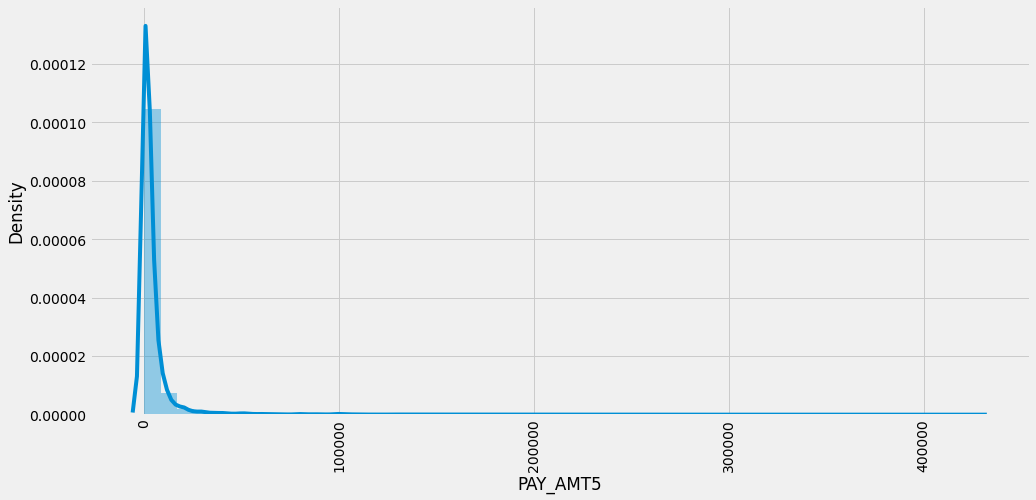

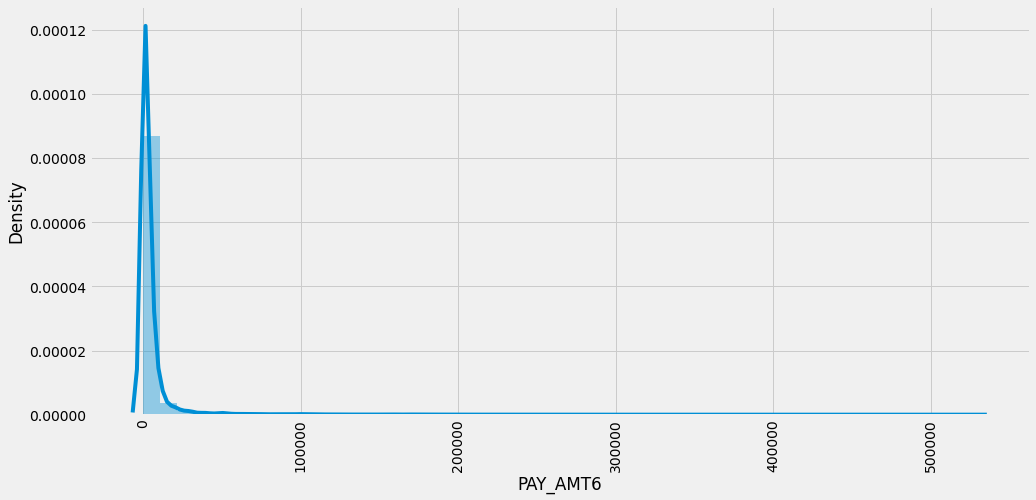

In [24]:
def drawplot(col):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(15,7))
    sns.distplot(df[col])
    plt.xticks(rotation='vertical')
    
toview = [ 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in toview:
    drawplot(col)


In [25]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [26]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

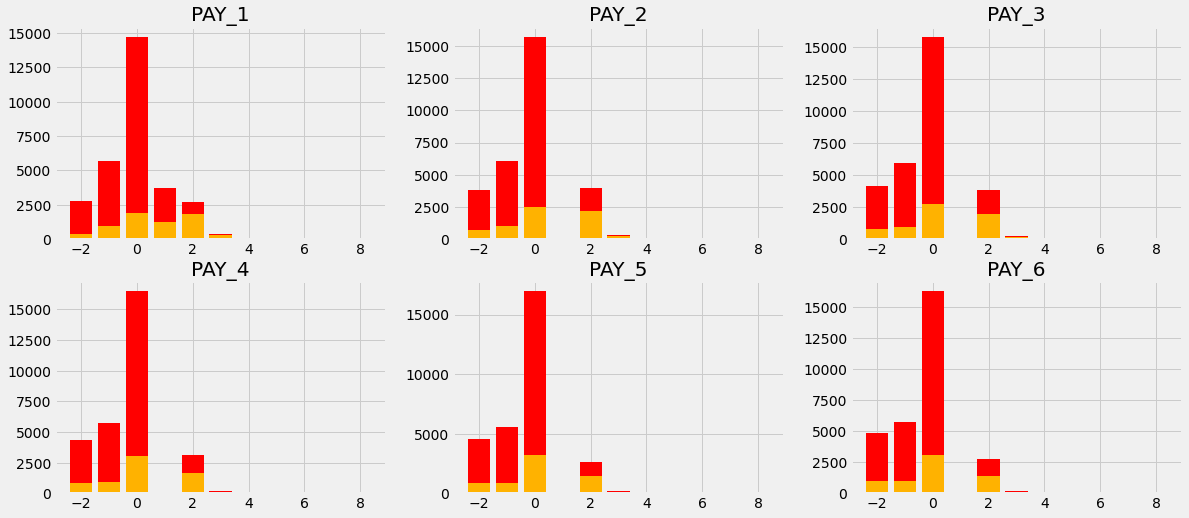

<Figure size 864x576 with 0 Axes>

In [27]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')

figure, ax = plt.subplots(2,3)
plt.figure(figsize=(12 , 8))
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

In [28]:
df.drop('ID', axis=1, inplace=True)

In [29]:
df.shape

(30000, 24)

In [30]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [31]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

Number of Male credit holder is less than Female.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

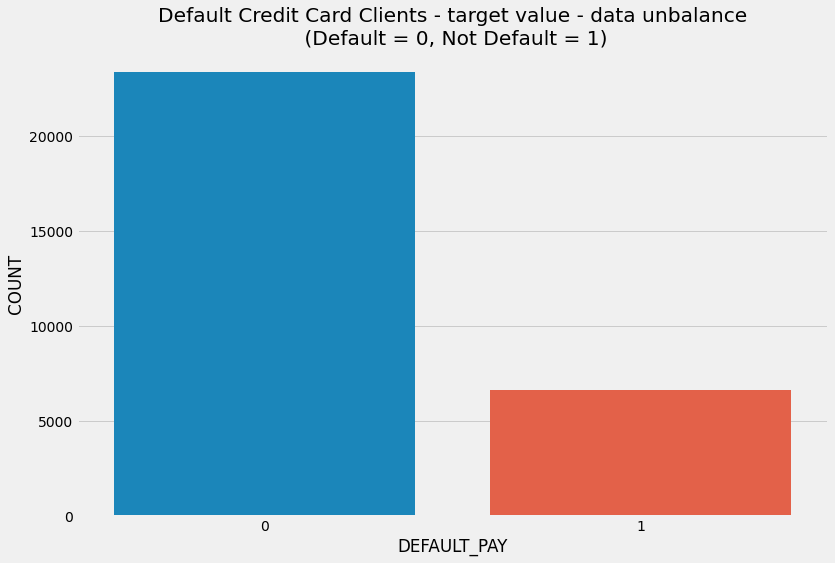

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(df['def_pay'])

plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Percentage of Defaulters are smaller than the Non Defaulters in the given dataset

As we can see our dataset is imbalanced one class has more points then the other.


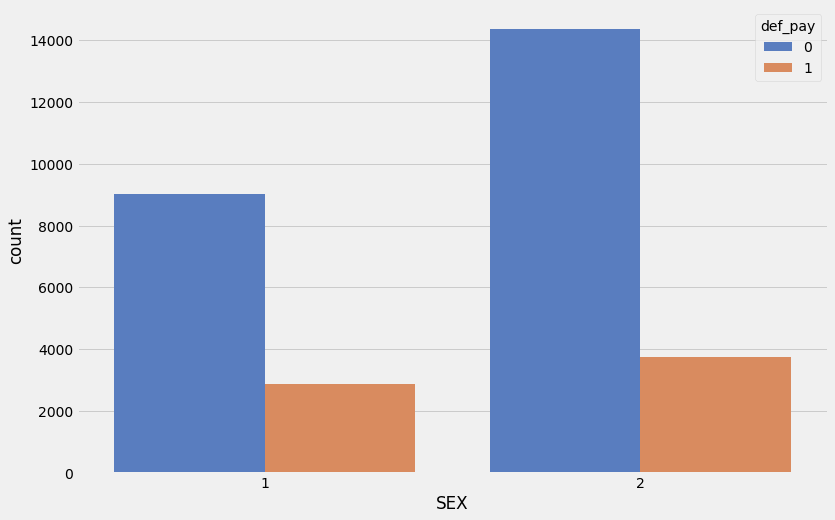

In [33]:
# Checking the number of counts of defaulters and non defaulters sexwise

plt.figure(figsize=(12, 8))
sns.countplot(x='SEX', data=df,hue="def_pay", palette="muted") 

females have overall less default payments wrt males.
Non-Defaults have a higher proportion of Females (Sex=2)

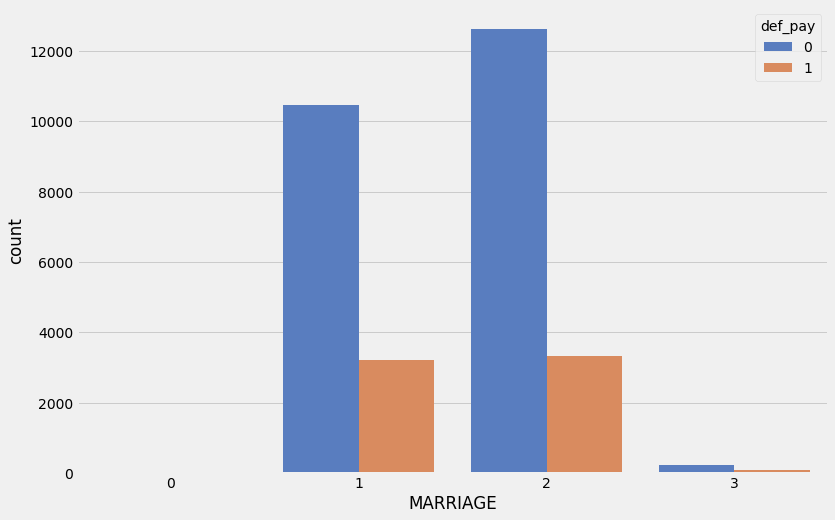

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(x="MARRIAGE", data=df,hue="def_pay", palette="muted")

#people who have marital status single have less default payment wrt married status people

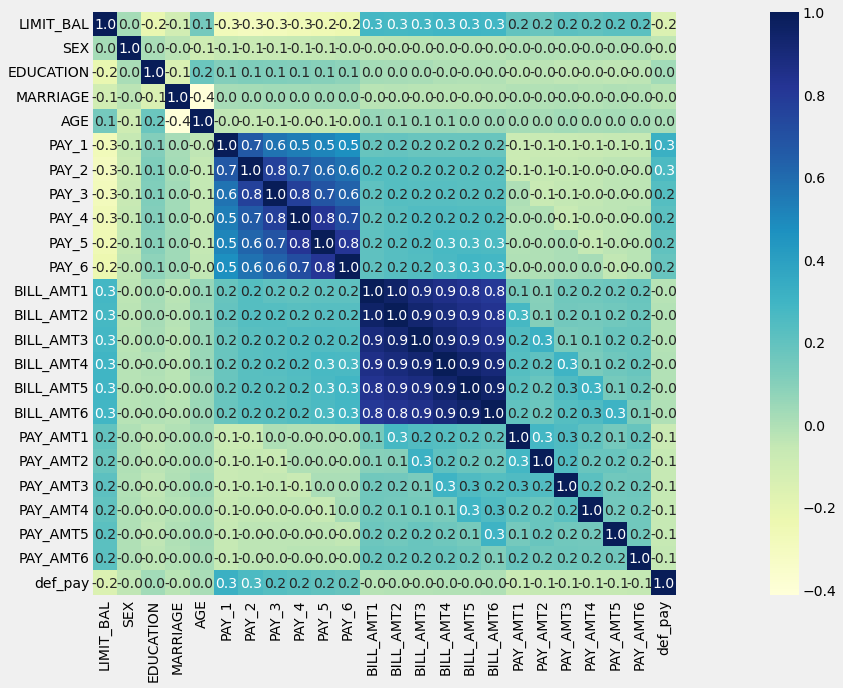

In [35]:
correlation = df.corr()
plt.subplots(figsize=(30 ,10))
sns.heatmap(correlation, square=True, annot=True, fmt='.1f',
            cmap="YlGnBu")

PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

<Figure size 864x576 with 0 Axes>

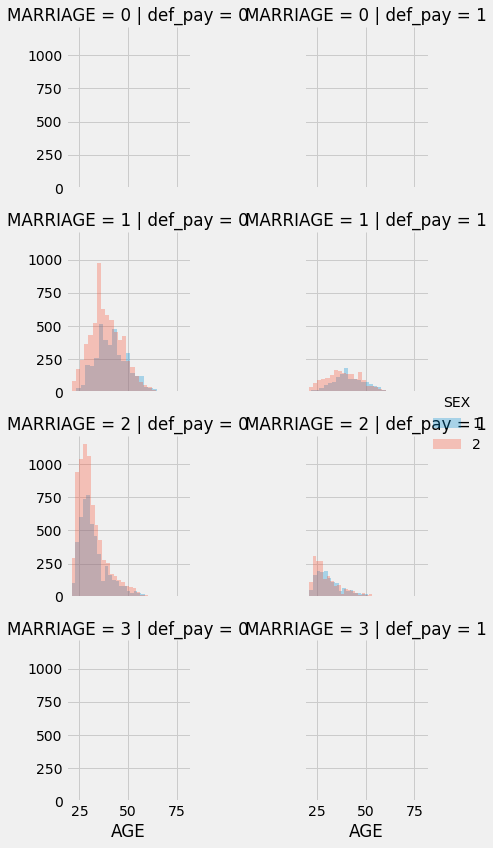

In [36]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

NonDefaults have a higher proportion of people 30-40years


NonDefaults have a higher proportion of Female age between 30-40years

In [37]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


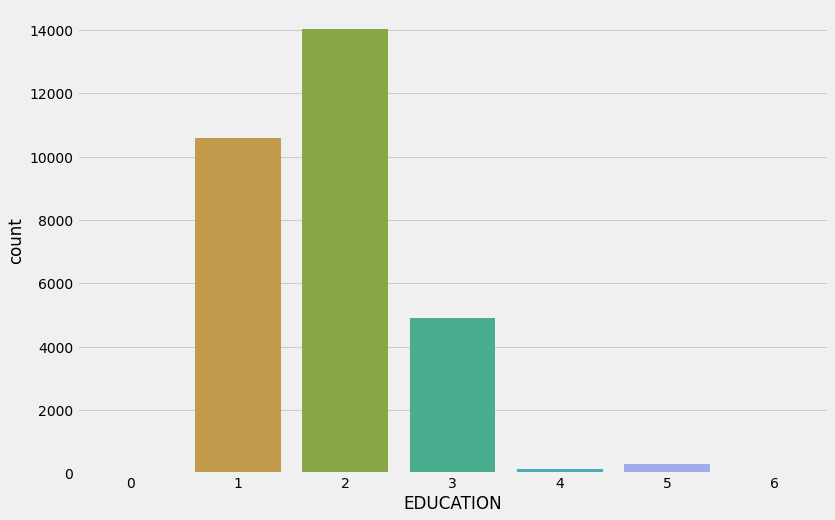

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(df['EDUCATION'])

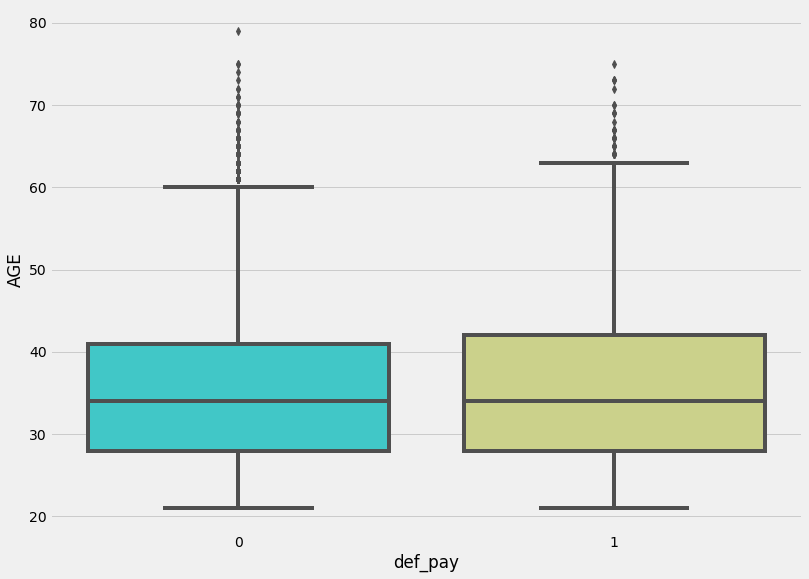

In [39]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='def_pay',y='AGE',data=df,palette='rainbow')

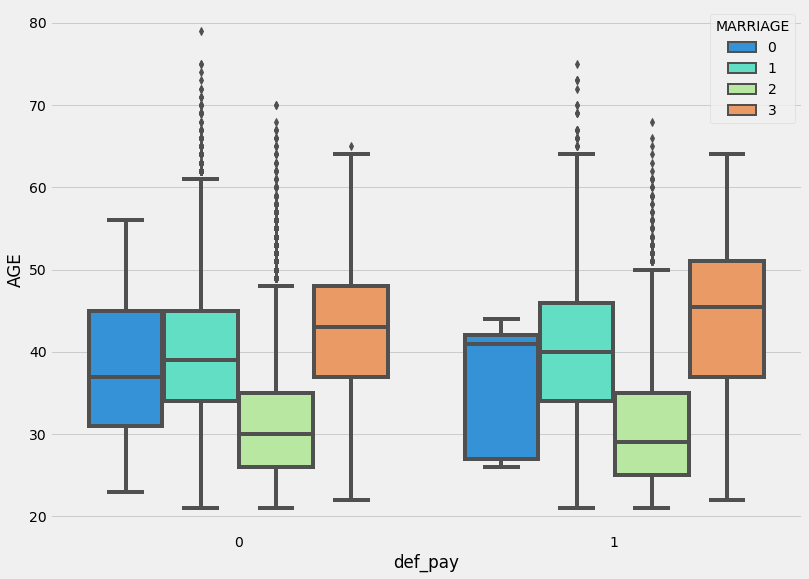

In [40]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")

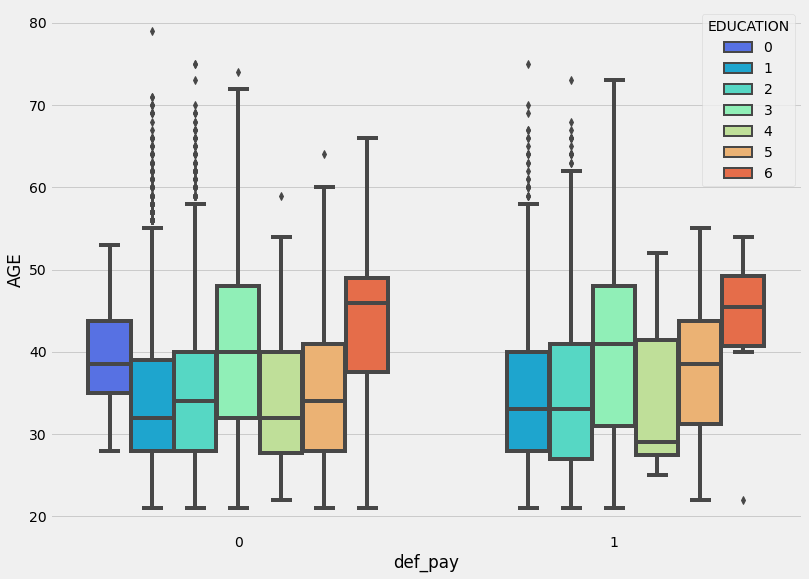

In [41]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )

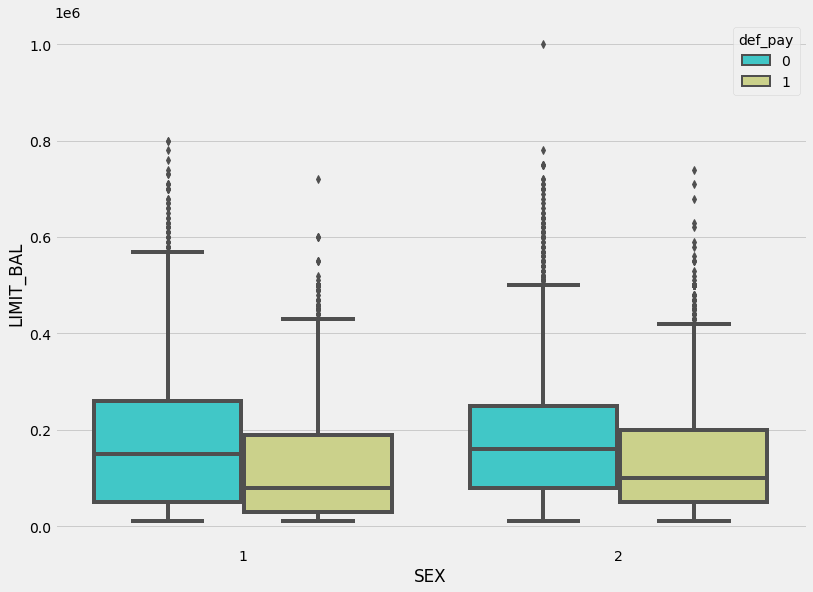

In [42]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=df ,palette="rainbow")


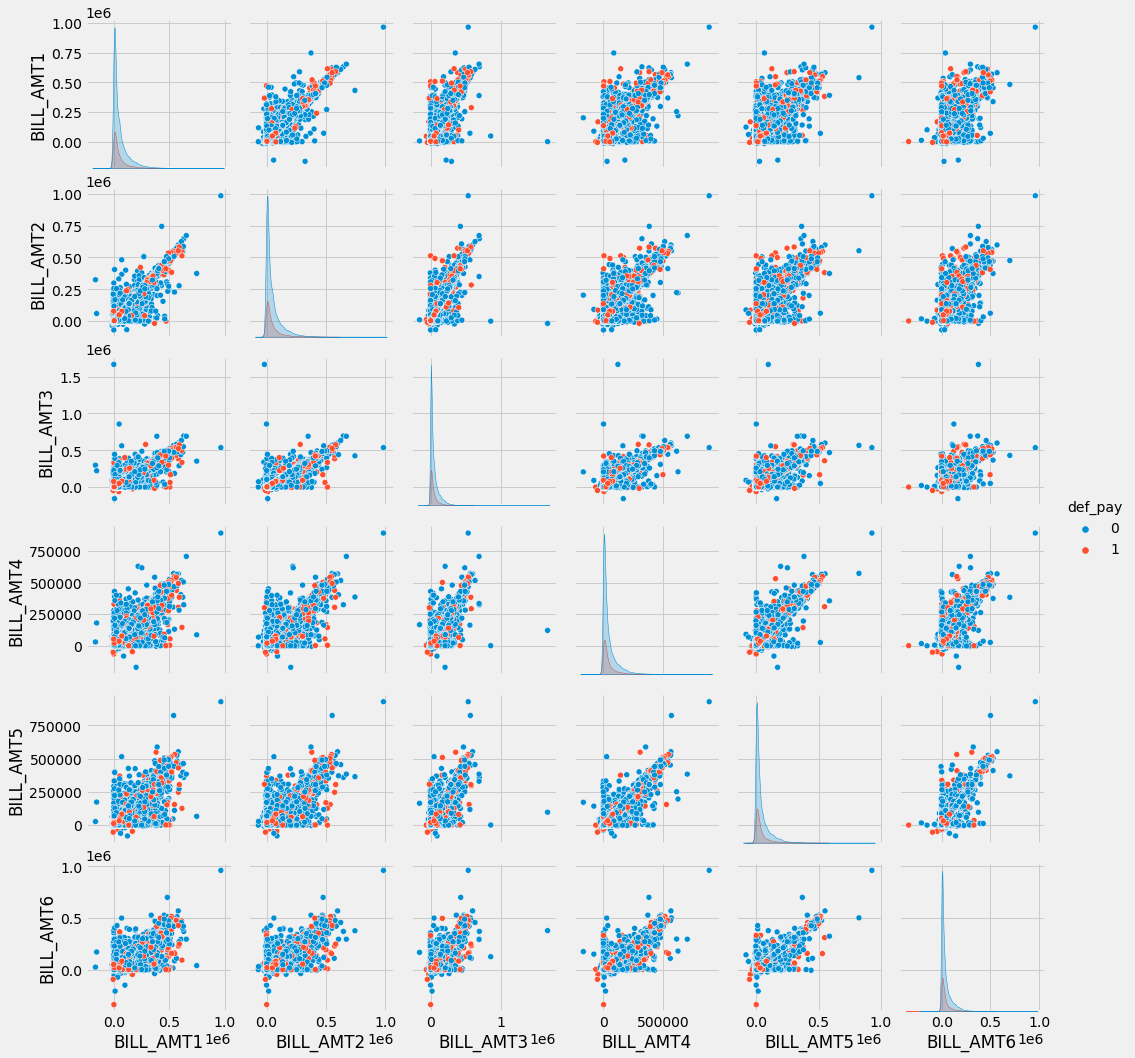

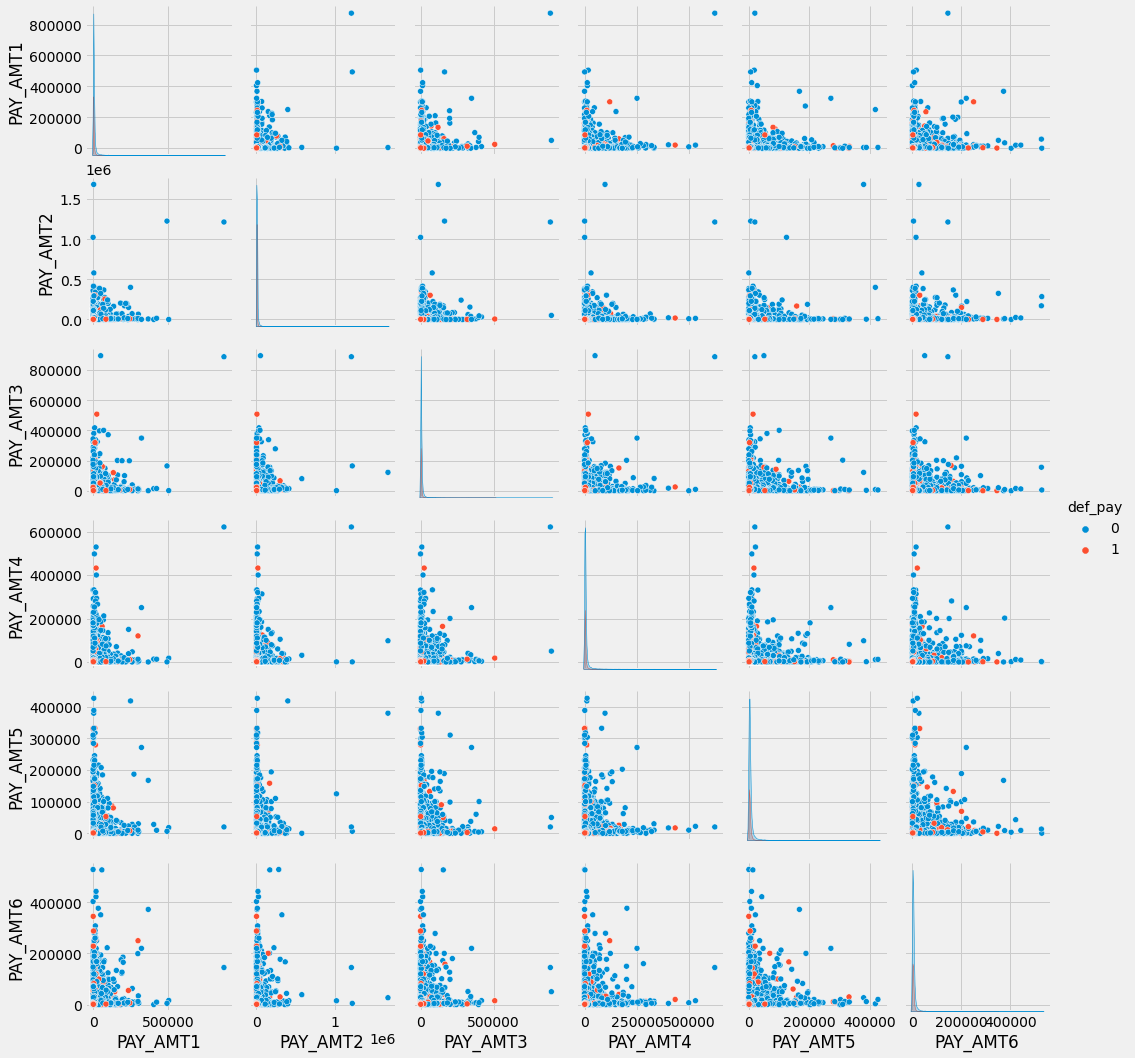

In [43]:
# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(df , vars=df.columns[17:23],hue = 'def_pay')

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [44]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION']

47       5
69       5
385      5
502      6
504      6
        ..
29811    5
29836    6
29839    5
29920    5
29966    5
Name: EDUCATION, Length: 345, dtype: int64

These values are missing so we will 

In [45]:
#5 ,6, unlabelled , category 0 have very few points so we fil it other
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [46]:
##MARRIAGE has a label 0 that is undocumented
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [47]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [48]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [49]:
df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [50]:
val = (df.PAY_1==-1) | (df.PAY_1==-2)


#df.loc[val , 'PAY_1']=0
#we have categories have -1  and -2 category which doesnt make sense so we will remove t

In [51]:
df.loc[val, 'PAY_1']=0

In [52]:
df.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [53]:
#same here
val = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[val,'PAY_2']=0

df.PAY_2.value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [54]:
val = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[val,'PAY_3']=0

df.PAY_3.value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [55]:
val = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[val,'PAY_4']=0

df.PAY_4.value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64

In [56]:
val = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[val,'PAY_5']=0

df.PAY_5.value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [57]:
val = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[val,'PAY_5']=0

df.PAY_5.value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [58]:
val = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[val,'PAY_6']=0

df.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [59]:
#description 
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [60]:

df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [61]:
#lower the columns
df.columns = df.columns.map(str.lower)

In [62]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'def_pay'],
      dtype='object')

In [63]:
col_to_norm = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

In [64]:
#normalize the data
import numpy as np
df[col_to_norm] = df[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

#Logistic Regression

In [65]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [66]:
df.shape

(30000, 24)

In [67]:
pd.value_counts(df.iloc[:, -1])

0    23364
1     6636
Name: def_pay, dtype: int64

In [68]:
x_train.shape

(21000, 23)

In [69]:
x_test.shape

(9000, 23)

In [70]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=5)
logmodel.fit(x_train, y_train)

LogisticRegression(random_state=5)

In [71]:
y_pred_log_1 = logmodel.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred_log_1)
acc = accuracy_score(y_test, y_pred_log_1)
prec = precision_score(y_test,y_pred_log_1)
rec  = recall_score(y_test, y_pred_log_1)
f1 = f1_score(y_test, y_pred_log_1)

In [73]:
log_1 = pd.DataFrame([['Logistic Regression 1', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

log_1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression 1,0.815333,0.680556,0.3185,0.433924,0.637893


In [74]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred_log_1)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred_log_1))

acc = accuracy_score(y_test , y_pred_log_1)
print("Accuracy of the model:" , acc)

[[6701  299]
 [1363  637]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7000
           1       0.68      0.32      0.43      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

Accuracy of the model: 0.8153333333333334


#logistic Regression with PCA

In [75]:
#with 95% of variance explained from the features
from sklearn.decomposition import PCA
log_reg2 = LogisticRegression()

pca = PCA(n_components=0.95)
x_train_pc = pca.fit_transform(x_train)

In [76]:
x_train_pc.shape

(21000, 16)

In [77]:
pca.explained_variance_ratio_
#explained variance from the features which are explaining 95% variance 

array([0.2575471 , 0.17367341, 0.07259071, 0.06617773, 0.04694623,
       0.04431165, 0.042357  , 0.03941389, 0.03788811, 0.03474655,
       0.03282533, 0.02866558, 0.02617078, 0.02332699, 0.02148486,
       0.0146722 ])

In [78]:
# View first 5 rows of  principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.167006,-0.142732,0.235139,0.097746,-0.508101,0.052698,-0.053990,-0.127373,-0.011238,0.010176,0.040062,0.071875,-0.547618,-0.539317,0.079003,0.044512
1,-0.010441,-0.033106,0.000199,-0.069659,0.017167,0.968101,0.076094,-0.098408,0.004344,-0.025628,0.001678,-0.005624,-0.092020,0.174733,-0.024103,-0.005158
2,-0.012685,0.053148,-0.191197,0.363727,0.634791,0.086855,0.142396,0.342413,-0.023843,0.153407,0.098938,0.042482,-0.305430,-0.380993,0.063712,0.023848
3,-0.020295,-0.000301,0.016592,-0.636070,0.176086,-0.159417,0.063683,0.120221,-0.022727,0.055135,0.051076,0.013214,-0.637607,0.326365,0.015734,-0.005515
4,0.032128,-0.005255,-0.007514,0.663077,-0.123620,-0.098170,-0.064544,-0.035197,-0.000432,-0.049641,-0.010842,-0.032488,-0.375086,0.619027,-0.035948,-0.007035


In [79]:
# Loop through different count of principal components for linear regression
x_train_pc = pca.fit_transform(x_train)
x_test_pc = pca.transform(x_test)
exp_variance = pca.explained_variance_ratio_
print(exp_variance)

[0.2575471  0.17367341 0.07259071 0.06617773 0.04694623 0.04431165
 0.042357   0.03941389 0.03788811 0.03474655 0.03282533 0.02866558
 0.02617078 0.02332699 0.02148486 0.0146722 ]


In [80]:
pca.n_components_
#so 16 pca are selected 

16

In [81]:
#fitting with PCA componenets in which we got 16 features others dropped
from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression()
classifier.fit(x_train_pc, y_train)
y_pred_log_pca = classifier.predict(x_test_pc)

In [82]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred_log_pca)
acc = accuracy_score(y_test, y_pred_log_pca)
prec = precision_score(y_test,y_pred_log_pca)
rec  = recall_score(y_test, y_pred_log_pca)
f1 = f1_score(y_test,y_pred_log_pca)


log_2_pca_clf = pd.DataFrame([['Logistic Regression PCA', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

log_2_pca_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression PCA,0.811,0.67404,0.2895,0.405037,0.62475


In [83]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred_log_pca)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred_log_pca))

acc = accuracy_score(y_test , y_pred_log_pca)
print("Accuracy of the model:" , acc)

[[6720  280]
 [1421  579]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7000
           1       0.67      0.29      0.41      2000

    accuracy                           0.81      9000
   macro avg       0.75      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

Accuracy of the model: 0.811


# SMOTE - Synthetic Minority Oversampling Technique (SMOTE)

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
x_train_sm , y_train_sm = sm.fit_resample(x_train, y_train)

In [85]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [86]:
y_log_pred_sm = logmodel.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_log_pred_sm)
acc = accuracy_score(y_test, y_log_pred_sm)
prec = precision_score(y_test, y_log_pred_sm)
rec  = recall_score(y_test, y_log_pred_sm)
f1 = f1_score(y_test, y_log_pred_sm)


log_3_sm_clf = pd.DataFrame([['Logistic Regression SMOTE', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

log_3_sm_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression SMOTE,0.779111,0.50276,0.5465,0.523718,0.696036


In [88]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_log_pred_sm)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_log_pred_sm))

acc = accuracy_score(y_test , y_log_pred_sm)
print("Accuracy of the model:" , acc)

[[5919 1081]
 [ 907 1093]]
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7000
           1       0.50      0.55      0.52      2000

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000

Accuracy of the model: 0.7791111111111111


In [89]:
#if we try cross-val 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logmodel, x_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_lr = np.mean(scores)

In [90]:
roc_auc_lr

0.7651181725318846

In [91]:
al = [log_1 ,log_2_pca_clf, log_3_sm_clf]
linear_regression_models = pd.concat(al)

In [92]:
linear_regression_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression 1,0.815333,0.680556,0.3185,0.433924,0.637893
0,Logistic Regression PCA,0.811000,0.674040,0.2895,0.405037,0.624750
0,Logistic Regression SMOTE,0.779111,0.502760,0.5465,0.523718,0.696036


logisti Regression 1 - gives accuracy of 81% precision, recall ,acc 0.680556	,
0.3185
0.433924
respectively.

Logistic Regression PCA	81%


Logistic Regression smote gives accuracy if 0.77911 with balanced classes.

1. it all depends on what metric does we give preference to .
2. smote model performs better if we care about precision recall and f1 score also roc value also increase with smote
3. accuracy decreases  in smote and rightly so model will be biased because one class is majority and other is minority in onther models.
4.logisticregression with SMOTE , balanced classes works fine.

#Random Forest Regression

In [93]:
#Initial fit using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [94]:
y_pred_rfc_1 = logmodel.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred_rfc_1)
acc = accuracy_score(y_test, y_pred_rfc_1)
prec = precision_score(y_test, y_pred_rfc_1)
rec  = recall_score(y_test, y_pred_rfc_1)
f1 = f1_score(y_test, y_pred_rfc_1)

rfc_1_clf = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

rfc_1_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier,0.779111,0.50276,0.5465,0.523718,0.696036


In [96]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred_rfc_1)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred_rfc_1))

acc = accuracy_score(y_test , y_pred_rfc_1)
print("Accuracy of the model:" , acc)

[[5919 1081]
 [ 907 1093]]
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7000
           1       0.50      0.55      0.52      2000

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000

Accuracy of the model: 0.7791111111111111


##RandomForestClassifier with PCA FEATURES using 

In [97]:

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier()
rfc2.fit(x_train_pc, y_train)

RandomForestClassifier()

In [98]:
y_pred_rfc_pca = rfc2.predict(x_test_pc)

In [99]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, y_pred_rfc_pca)
acc = accuracy_score(y_test, y_pred_rfc_pca)
prec = precision_score(y_test, y_pred_rfc_pca)
rec  = recall_score(y_test, y_pred_rfc_pca)
f1 = f1_score(y_test, y_pred_rfc_pca)


rfc_2_pca = pd.DataFrame([['RanodmForestClassifier PCA', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

rfc_2_pca

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,RanodmForestClassifier PCA,0.809778,0.627434,0.3545,0.453035,0.647179


In [100]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred_rfc_pca )
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred_rfc_pca ))

acc = accuracy_score(y_test , y_pred_rfc_pca )
print("Accuracy of the model:" , acc)

[[6579  421]
 [1291  709]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7000
           1       0.63      0.35      0.45      2000

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy of the model: 0.8097777777777778


# Random Forest Classifier with smote 

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc3_sm = RandomForestClassifier()
rfc3_sm.fit(x_train_sm , y_train_sm)

RandomForestClassifier()

In [102]:
rfc3_sm_pred = rfc3_sm.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, rfc3_sm_pred)
acc = accuracy_score(y_test, rfc3_sm_pred)
prec = precision_score(y_test, rfc3_sm_pred)
rec  = recall_score(y_test, rfc3_sm_pred)
f1 = f1_score(y_test, rfc3_sm_pred)

In [104]:
rfc3_sm_clf = pd.DataFrame([['RandomForestClassifier SMOTE', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

rfc3_sm_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,RandomForestClassifier SMOTE,0.792444,0.537204,0.4765,0.505034,0.679607


In [105]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , rfc3_sm_pred)
print(cfm)
print("Classification report :")

print(classification_report(y_test , rfc3_sm_pred))

acc = accuracy_score(y_test , rfc3_sm_pred)
print("Accuracy of the model:" , acc)

[[6179  821]
 [1047  953]]
Classification report :
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7000
           1       0.54      0.48      0.51      2000

    accuracy                           0.79      9000
   macro avg       0.70      0.68      0.69      9000
weighted avg       0.78      0.79      0.79      9000

Accuracy of the model: 0.7924444444444444


In [106]:
all_models = [rfc_1_clf, rfc_2_pca, rfc3_sm_clf]
random_forest_models = pd.concat(all_models)

In [107]:
random_forest_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier,0.779111,0.502760,0.5465,0.523718,0.696036
0,RanodmForestClassifier PCA,0.809778,0.627434,0.3545,0.453035,0.647179
0,RandomForestClassifier SMOTE,0.792444,0.537204,0.4765,0.505034,0.679607


In [108]:
#randomForest classfier with smote and without balanced classes target var give similar almost result 
#pca model gives accuracy but that can be becauase our class imbalance so one class is over represnted

1. random forest gives 77% of accuracy withoud balancing the target feature.
2. with pca it gives 80% of accuracy.
3. with equal points in target class it gives 78% of accuracy.
4. although precision and recall reduces as well roc val too.

KNN K-Nearest Neighbour

In [109]:
#now lets try knn models

In [110]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

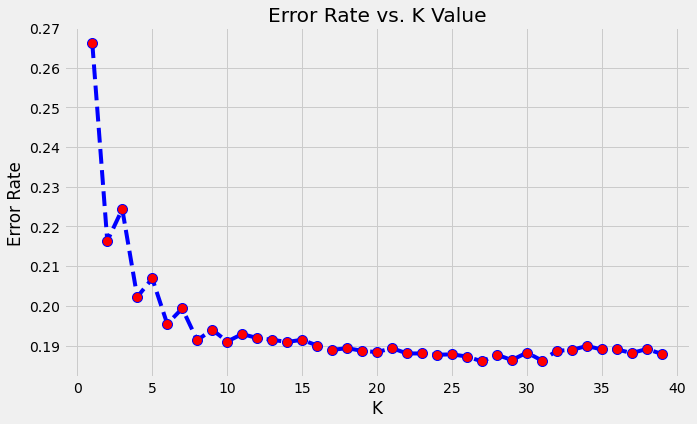

In [111]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [112]:
#selected n_neighbors=7

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn1_clf = KNeighborsClassifier(n_neighbors=7)

knn1_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [114]:
#prediction
y_pred_knn = knn1_clf.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score , recall_score

roc = roc_auc_score(y_test, y_pred_knn )
acc = accuracy_score(y_test, y_pred_knn )
prec = precision_score(y_test, y_pred_knn )
rec  = recall_score(y_test, y_pred_knn )
f1 = f1_score(y_test, y_pred_knn )

knn1 = pd.DataFrame([['K-NNeighbours', acc, prec, rec, f1, roc]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [116]:
knn1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-NNeighbours,0.800667,0.586265,0.35,0.438322,0.639714


In [117]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred_knn )
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_pred_knn ))

acc = accuracy_score(y_test , y_pred_knn )
print("Accuracy of the model:" , acc)

[[6506  494]
 [1300  700]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7000
           1       0.59      0.35      0.44      2000

    accuracy                           0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000

Accuracy of the model: 0.8006666666666666


K-NN with PCA

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn2_pca = KNeighborsClassifier(n_neighbors=7)

knn2_pca.fit(x_train_pc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [119]:
knn_pred_pca = knn2_pca.predict(x_test_pc)

In [120]:
roc = roc_auc_score(y_test, knn_pred_pca)
acc = accuracy_score(y_test, knn_pred_pca)
prec = precision_score(y_test, knn_pred_pca)
rec  = recall_score(y_test, knn_pred_pca)
f1 = f1_score(y_test, knn_pred_pca)

knn2_pca_clf = pd.DataFrame([['K-NNeighbours with PCA', acc, prec, rec, f1, roc]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [121]:
knn2_pca_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-NNeighbours with PCA,0.800556,0.586352,0.348,0.436774,0.638929


In [122]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , knn_pred_pca)
print(cfm)
print("Classification report :")

print(classification_report(y_test , knn_pred_pca))

acc = accuracy_score(y_test , knn_pred_pca)
print("Accuracy of the model:" , acc)

[[6509  491]
 [1304  696]]
Classification report :
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7000
           1       0.59      0.35      0.44      2000

    accuracy                           0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000

Accuracy of the model: 0.8005555555555556


# KNN with SMOTE


In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn3_sm = KNeighborsClassifier(n_neighbors=7)

knn3_sm.fit(x_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=7)

In [124]:
knn3_pred_sm = knn3_sm.predict(x_test)

In [125]:
roc = roc_auc_score(y_test, knn3_pred_sm)
acc = accuracy_score(y_test, knn3_pred_sm)
prec = precision_score(y_test, knn3_pred_sm)
rec  = recall_score(y_test, knn3_pred_sm)
f1 = f1_score(y_test, knn3_pred_sm)

knn3_sm_clf = pd.DataFrame([['K-NNeighbours with SMOTE', acc, prec, rec, f1, roc]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

knn3_sm_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-NNeighbours with SMOTE,0.663889,0.356643,0.6375,0.457399,0.654464


In [126]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , knn3_pred_sm)
print(cfm)
print("Classification report :")

print(classification_report(y_test , knn3_pred_sm))

acc = accuracy_score(y_test , knn3_pred_sm)
print("Accuracy of the model:" , acc)

[[4700 2300]
 [ 725 1275]]
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7000
           1       0.36      0.64      0.46      2000

    accuracy                           0.66      9000
   macro avg       0.61      0.65      0.61      9000
weighted avg       0.75      0.66      0.69      9000

Accuracy of the model: 0.6638888888888889


In [127]:
all_models = [knn1, knn2_pca_clf, knn3_sm_clf]
knn_model = pd.concat(all_models)

In [128]:
knn_model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-NNeighbours,0.800667,0.586265,0.3500,0.438322,0.639714
0,K-NNeighbours with PCA,0.800556,0.586352,0.3480,0.436774,0.638929
0,K-NNeighbours with SMOTE,0.663889,0.356643,0.6375,0.457399,0.654464


knn with imabalance data gives high accuracy and preicison ,recall and f1 score but with smote it performse worse

#SVM Classifier

In [129]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv1 = SVC(kernel = 'rbf', random_state = 0)

In [130]:
scv1.fit(x_train, y_train)

SVC(random_state=0)

In [131]:
y_svc_pred = scv1.predict(x_test)

In [132]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_svc_pred)
acc = accuracy_score(y_test, y_svc_pred)
prec = precision_score(y_test, y_svc_pred)
rec = recall_score(y_test, y_svc_pred)
f1 = f1_score(y_test, y_svc_pred)

svc1_clf = pd.DataFrame([['SVC ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
svc1_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC,0.818111,0.675024,0.35,0.460981,0.650929


In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(y_test, y_svc_pred)

print(cfm)
print("Classification report :")

print(classification_report(y_test , y_svc_pred))

acc = accuracy_score(y_test , y_svc_pred)
print("Accuracy of the model:" , acc)

[[6663  337]
 [1300  700]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.68      0.35      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Accuracy of the model: 0.8181111111111111


#SVC classifier with PCA model

In [134]:
from sklearn.svm import SVC
svc_pca = SVC(kernel = 'rbf', random_state=0)
svc_pca.fit(x_train_pc, y_train)

SVC(random_state=0)

In [135]:
svc_pca_pred = svc_pca.predict(x_test_pc)

In [136]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, svc_pca_pred)
acc = accuracy_score(y_test, svc_pca_pred)
prec = precision_score(y_test, svc_pca_pred)
rec  = recall_score(y_test, svc_pca_pred)
f1 = f1_score(y_test, svc_pca_pred)


In [137]:

svc2_clf = pd.DataFrame([['SVCwithPCA', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

svc2_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVCwithPCA,0.816556,0.663543,0.354,0.461689,0.651357


In [138]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , svc_pca_pred)
print(cfm)
print("Classification report :")

print(classification_report(y_test , svc_pca_pred))

acc = accuracy_score(y_test ,svc_pca_pred)
print("Accuracy of the model:" , acc)

[[6641  359]
 [1292  708]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.35      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000

Accuracy of the model: 0.8165555555555556


# SVC classfiier with SMOTE

In [139]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc3_rm = SVC(kernel = 'rbf', random_state = 0)

In [140]:
svc3_rm.fit(x_train_sm, y_train_sm)

SVC(random_state=0)

In [141]:
svc3_rm_pred = svc3_rm.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc = roc_auc_score(y_test, svc3_rm_pred)
acc = accuracy_score(y_test, svc3_rm_pred)
prec = precision_score(y_test, svc3_rm_pred)
rec  = recall_score(y_test,svc3_rm_pred)
f1 = f1_score(y_test, svc3_rm_pred)


svc3_clf = pd.DataFrame([['SVC classifier SMOTE', acc,prec,rec, f1,roc]],
    columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

svc3_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC classifier SMOTE,0.761,0.46947,0.5805,0.519115,0.696536


In [143]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , svc3_rm_pred )
print(cfm)
print("Classification report :")

print(classification_report(y_test , svc3_rm_pred ))

acc = accuracy_score(y_test , svc3_rm_pred )
print("Accuracy of the model:" , acc)

[[5688 1312]
 [ 839 1161]]
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7000
           1       0.47      0.58      0.52      2000

    accuracy                           0.76      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.76      0.77      9000

Accuracy of the model: 0.761


In [144]:
all_models = [svc1_clf , svc2_clf , svc3_clf]
svc_models = pd.concat(all_models)

In [145]:
svc_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVC,0.818111,0.675024,0.3500,0.460981,0.650929
0,SVCwithPCA,0.816556,0.663543,0.3540,0.461689,0.651357
0,SVC classifier SMOTE,0.761000,0.469470,0.5805,0.519115,0.696536


In [146]:
#model with balanced classes gives
# good precision and recall, f1 sore values

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc3_rm, x_train_sm, y_train_sm, scoring ="roc_auc", cv = 5)
roc_auc_lr = np.mean(scores)

In [148]:
roc_auc_lr

0.7932897042599432

# XGB Classifier

In [149]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier()
xgb1.fit(x_train ,y_train)

XGBClassifier()

In [150]:
xgb1_pred = xgb1.predict(x_test)

In [151]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, xgb1_pred)
acc = accuracy_score(y_test, xgb1_pred)
prec = precision_score(y_test, xgb1_pred)
rec = recall_score(y_test, xgb1_pred)
f1 = f1_score(y_test, xgb1_pred)

xgb1_clf = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
xgb1_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.819556,0.682171,0.352,0.46438,0.652571


In [152]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , xgb1_pred )
print(cfm)
print("Classification report :")

print(classification_report(y_test , xgb1_pred ))

acc = accuracy_score(y_test , xgb1_pred )
print("Accuracy of the model:" , acc)

[[6672  328]
 [1296  704]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.68      0.35      0.46      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Accuracy of the model: 0.8195555555555556


# XGB with PCA

In [153]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier()
xgb2.fit(x_train_pc ,y_train)

XGBClassifier()

In [154]:
y_xgb_pc = xgb2.predict(x_test_pc)

In [155]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_xgb_pc)
acc = accuracy_score(y_test, y_xgb_pc)
prec = precision_score(y_test, y_xgb_pc)
rec = recall_score(y_test, y_xgb_pc)
f1 = f1_score(y_test, y_xgb_pc)

xgb_pca = pd.DataFrame([['XGBOOSTPCAClassifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
xgb_pca

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOSTPCAClassifier,0.816222,0.656987,0.362,0.466796,0.654


In [156]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_xgb_pc)
print(cfm)
print("Classification report :")

print(classification_report(y_test , y_xgb_pc))

acc = accuracy_score(y_test ,y_xgb_pc)
print("Accuracy of the model:" , acc)

[[6622  378]
 [1276  724]]
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.66      0.36      0.47      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Accuracy of the model: 0.8162222222222222


XGB SMOTE

In [157]:
from xgboost import XGBClassifier
xgb3 = XGBClassifier()
xgb3.fit(x_train_sm ,y_train_sm)


xgb_pred_sm = xgb3.predict(x_test)

In [158]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, xgb_pred_sm)
acc = accuracy_score(y_test, xgb_pred_sm)
prec = precision_score(y_test, xgb_pred_sm)
rec = recall_score(y_test, xgb_pred_sm)
f1 = f1_score(y_test, xgb_pred_sm)

xgb3_clf = pd.DataFrame([['XGBOOST SMOTE', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
xgb3_clf

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST SMOTE,0.786667,0.520408,0.51,0.515152,0.687857


In [159]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , xgb_pred_sm )
print(cfm)
print("Classification report :")

print(classification_report(y_test , xgb_pred_sm ))

acc = accuracy_score(y_test ,xgb_pred_sm )
print("Accuracy of the model:" , acc)

[[6060  940]
 [ 980 1020]]
Classification report :
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7000
           1       0.52      0.51      0.52      2000

    accuracy                           0.79      9000
   macro avg       0.69      0.69      0.69      9000
weighted avg       0.79      0.79      0.79      9000

Accuracy of the model: 0.7866666666666666


1. Both TN True Negative and TP True Positive are high which we want the diagonal values should be high false negative should be low..
2. False positive and False negative are low 
which means our model is better then all till now we have made

In [160]:
from xgboost import XGBClassifier
xgb4 = XGBClassifier(max_depth = 3, min_child_weight = 2, n_estimators = 50)
xgb4.fit(x_train_sm ,y_train_sm)

xgb_pred_sm4 = xgb4.predict(x_test)

In [161]:
roc=roc_auc_score(y_test, xgb_pred_sm4 )
acc = accuracy_score(y_test, xgb_pred_sm4 )
prec = precision_score(y_test, xgb_pred_sm4 )
rec = recall_score(y_test, xgb_pred_sm4 )
f1 = f1_score(y_test, xgb_pred_sm4 )
xgb4last =  pd.DataFrame([['XGBOOSTtuning', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

xgb4last

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOSTtuning,0.782889,0.510688,0.5495,0.529383,0.699536


In [162]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , xgb_pred_sm4)
print(cfm)
print("Classification report :")

print(classification_report(y_test , xgb_pred_sm4 ))

acc = accuracy_score(y_test ,xgb_pred_sm4 )
print("Accuracy of the model:" , acc)

[[5947 1053]
 [ 901 1099]]
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7000
           1       0.51      0.55      0.53      2000

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000

Accuracy of the model: 0.7828888888888889


In [163]:
all_model = [xgb1_clf,  xgb_pca, xgb3_clf,  xgb4last]
xgb_models = pd.concat(all_model)


In [164]:
xgb_models

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.819556,0.682171,0.3520,0.464380,0.652571
0,XGBOOSTPCAClassifier,0.816222,0.656987,0.3620,0.466796,0.654000
0,XGBOOST SMOTE,0.786667,0.520408,0.5100,0.515152,0.687857
0,XGBOOSTtuning,0.782889,0.510688,0.5495,0.529383,0.699536


In [165]:
#XGB with SMOTE Performs best after hyperparameter tuning it gives best result
#accuracy of xgboost gives 78% of accuracy and auc_score is also good

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

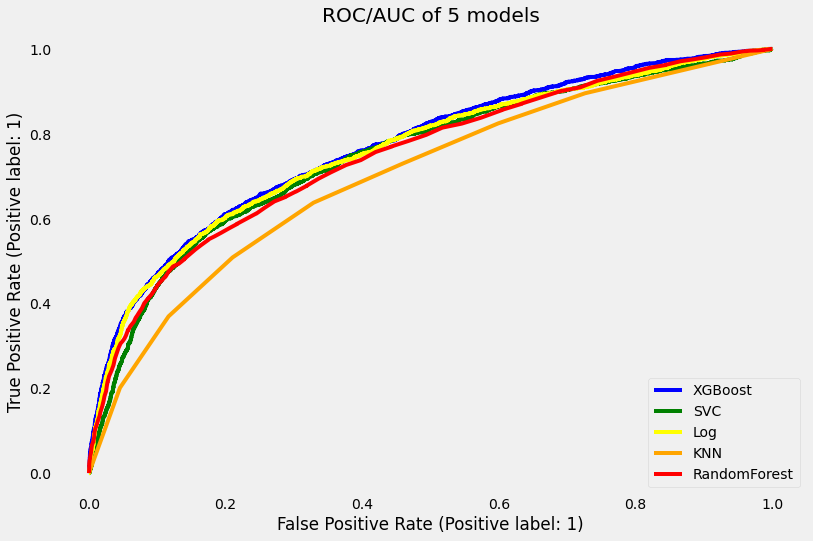

In [166]:
# Plot ROC_AUC curve of 3 models
from sklearn.metrics import plot_roc_curve
fig,ax=plt.subplots(figsize=(12,8))

plot_roc_curve(xgb4, x_test, y_test,ax=ax, color="blue",label='XGBoost')
plot_roc_curve(svc3_rm, x_test, y_test,ax=ax, color="green",label='SVC')
plot_roc_curve(logmodel, x_test, y_test,ax=ax, color="yellow",label='Log')
plot_roc_curve(knn3_sm, x_test, y_test,ax=ax, color="orange",label='KNN')
plot_roc_curve(rfc3_sm, x_test, y_test,ax=ax, color="red",label='RandomForest')


plt.title('ROC/AUC of 5 models')
plt.grid()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

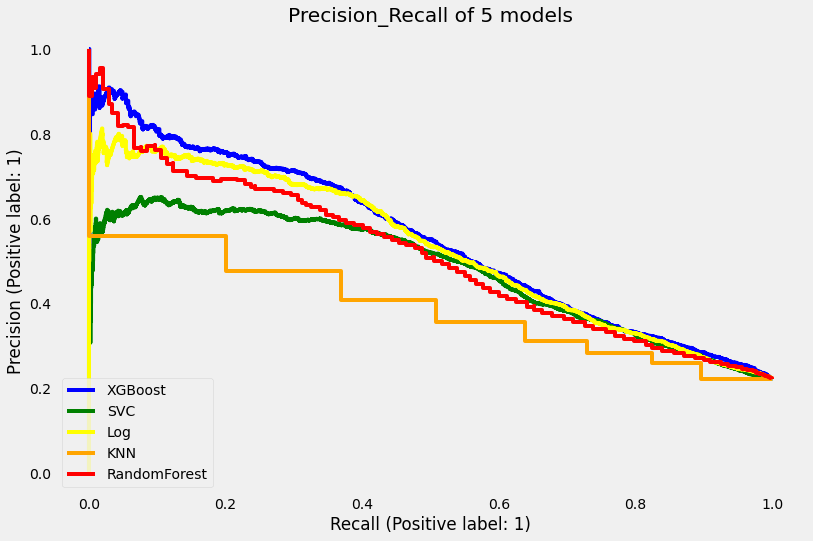

In [167]:
# Plot ROC_AUC curve of 3 models
from sklearn.metrics import plot_precision_recall_curve
fig,ax=plt.subplots(figsize=(12,8))

plot_precision_recall_curve(xgb4, x_test, y_test,ax=ax, color="blue",label='XGBoost')
plot_precision_recall_curve(svc3_rm, x_test, y_test,ax=ax, color="green",label='SVC')
plot_precision_recall_curve(logmodel, x_test, y_test,ax=ax, color="yellow",label='Log')
plot_precision_recall_curve(knn3_sm, x_test, y_test,ax=ax, color="orange",label='KNN')
plot_precision_recall_curve(rfc3_sm, x_test, y_test,ax=ax, color="red",label='RandomForest')


plt.title('Precision_Recall of 5 models')
plt.grid()

In [168]:
combined  = [linear_regression_models ,random_forest_models ,knn_model ,svc_models, xgb_models]
pd.concat(combined)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression 1,0.815333,0.680556,0.3185,0.433924,0.637893
0,Logistic Regression PCA,0.811000,0.674040,0.2895,0.405037,0.624750
0,Logistic Regression SMOTE,0.779111,0.502760,0.5465,0.523718,0.696036
0,Random Forest Classifier,0.779111,0.502760,0.5465,0.523718,0.696036
0,RanodmForestClassifier PCA,0.809778,0.627434,0.3545,0.453035,0.647179
0,RandomForestClassifier SMOTE,0.792444,0.537204,0.4765,0.505034,0.679607
0,K-NNeighbours,0.800667,0.586265,0.3500,0.438322,0.639714
0,K-NNeighbours with PCA,0.800556,0.586352,0.3480,0.436774,0.638929
0,K-NNeighbours with SMOTE,0.663889,0.356643,0.6375,0.457399,0.654464
0,SVC,0.818111,0.675024,0.3500,0.460981,0.650929


# Conclusion

XGB performs best and thats the one we will choose because 
FN and FP are less and TP and TN are more which we desire,
further more the precision, recall score is also good we 
can try undersampling or oversampling to further check if it will give high values of precision..... 

If we balance both classes model has high chance giving precision recall values higher then compared to PCA or with unbalanced target variables.


1)Using a Logistic Regression classifier, we can predict with 77.9% accuracy, whether a customer is likely to default next month.


2)Using a Random Forest classifier, we can predict with 79% accuracy, whether a customer is likely to default next month.


3)Using a K-Nearest Neighbour classifier, we can predict with 60 % accuracy, whether a customer is likely to default next month.

4)Using a Support Vector Machine classifier, we can predict with 76& accuracy, whether a customer is likely to default next month.

5)Using a XGBOOST classifier, we can predict with 78% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.

 